In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import tensorflow as tf
import pandas as pd

In [2]:
data_dir = Path('C:/Workspace/Data/MNIST')

f = gzip.open(data_dir/'train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 60000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data[2]).squeeze()
# plt.imshow(image)
# plt.show()


In [3]:
f = gzip.open(data_dir/'train-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [4]:
X = np.asarray(data).squeeze()
y = labels
shape = (28, 28)

In [5]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
        ])


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                metrics=['accuracy'])

In [7]:
history = model.fit(
    X, y,
    batch_size=500,
    epochs=100,
)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 22us/sample - loss: 2.7349 - accuracy: 0.7535
Epoch 2/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.3654 - accuracy: 0.9028
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2372 - accuracy: 0.9326
Epoch 4/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1718 - accuracy: 0.9493
Epoch 5/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1319 - accuracy: 0.9607
Epoch 6/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.1050 - accuracy: 0.9681
Epoch 7/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0857 - accuracy: 0.9730
Epoch 8/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0679 - accuracy: 0.9791
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0559 - accuracy: 0.9819
Epoch

60000/60000 [==============================] - 1s 14us/sample - loss: 0.0192 - accuracy: 0.9951
Epoch 77/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0165 - accuracy: 0.9957
Epoch 78/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0111 - accuracy: 0.9967
Epoch 79/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0056 - accuracy: 0.9982
Epoch 80/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0041 - accuracy: 0.9988
Epoch 81/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0066 - accuracy: 0.9983
Epoch 82/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0094 - accuracy: 0.9974
Epoch 83/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0198 - accuracy: 0.9950
Epoch 84/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0160 - accuracy: 0.9952
Epoch 85/100
60000/60000 [======

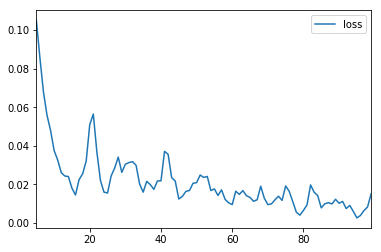

In [8]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [9]:
# test

f = gzip.open(data_dir/'t10k-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 10000


f.read(16)
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size, 1)

# image = np.asarray(data_test[2]).squeeze()
# plt.imshow(image)
# plt.show()

In [10]:
f = gzip.open(data_dir/'t10k-labels-idx1-ubyte.gz','r')
f.read(8)
# for i in range(0,5):
#     buf = f.read(1)
#     labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
#     print(labels)

buf = f.read(num_images)
labels_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
# print(labels)

In [11]:
# predictions = model.predict(data_test)
X = np.asarray(data_test).squeeze()
y = labels_test
test_loss, test_acc = model.evaluate(X,  y)
print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.9723
